
## Objetivo da Aula

- Apresentar e usar a regressão polinomial
- Entender o funcionamento do XGBoost (eXtreme Gradient Boosting) e sua aplicação em problemas de regressão.
- Aplicar o XGBoost para prever o valor.
- Aprender boas práticas de pré-processamento, treinamento e avaliação de modelos de machine learning.

## Regressão Polinomial

$$
Y = A + BX + C X² \\
$$
A, B e C são constantes que determinam a posição e inclinação da curva, o 2 indica o grau do polinômio. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão Polinomial é:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² \\
$$

$ \beta_o $ , $ \beta_1 $ e $ \beta_2 $ são parâmetros que determinam o peso da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.


Essa ideia se estende para polinômio de graus maiores:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² + ... + \beta_nX^n\\
$$



Soma dos Erros ao Quadrado (SSE): 602124 
Erro Quadrático Médio (MSE): 20070.81
Erro Médio Absoluto (MAE): 104.66
Raiz do Erro Quadrático Médio (RMSE): 141.67 
R2-score: 0.55


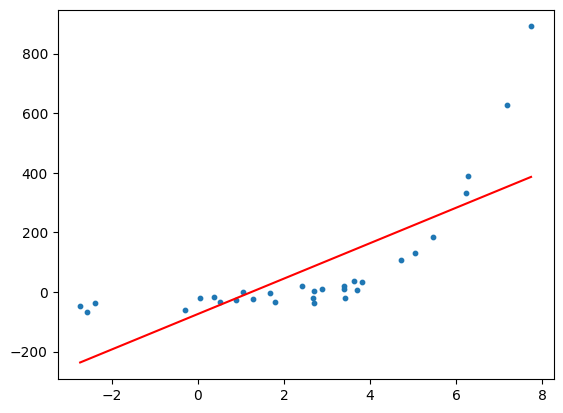

In [55]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#####----------- vou gerar alguns numeros aleatórios ------------------

#gerando numeros aleatorios, apenas para este exemplo
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3)+ 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)

# ajuste nos dados, pois estamos trabalhando com a numpy 
x = x[:, np.newaxis]
y = y[:, np.newaxis]
####---------------pronto já temos os dados para treinar -------------


#----É aqui que o seu código muda ------------------------------------

# Chama a função definindo o grau do polinomio e aplica o modelo

grau_poly = 1
polynomial_features= PolynomialFeatures(degree = grau_poly)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='r')
plt.show()

## XGBoost

O XGBoost (eXtreme Gradient Boosting) é um algoritmo de machine learning baseado em gradient boosting, amplamente utilizado em tarefas de regressão, classificação e ranqueamento. Ele é conhecido por sua alta performance, escalabilidade e capacidade de lidar com datasets complexos.

### Conceitos Fundamentais

1. Boosting:

- Boosting é uma técnica de ensemble que combina vários modelos fracos (geralmente árvores de decisão) para criar um modelo forte.
- No boosting, os modelos são treinados sequencialmente, onde cada modelo tenta corrigir os erros dos anteriores, dando mais peso às instâncias mal previstas.

2. Gradient Boosting:

- O gradient boosting usa o gradiente descendente para minimizar uma função de perda (ex.: erro quadrático médio para regressão).
- Cada árvore é ajustada para prever o resíduo (erro) do modelo anterior, reduzindo gradualmente o erro total.

3. Características do XGBoost:

- Regularização: Inclui penalidades L1 (Lasso) e L2 (Ridge) para evitar overfitting, tornando o modelo mais robusto.
- Paralelismo: Otimiza o treinamento usando múltiplos núcleos de CPU, tornando-o rápido mesmo em datasets grandes.
- Tratamento de Missing Values: Lida automaticamente com valores ausentes, decidindo a melhor direção para cada nó da árvore.
- Importância de Features: Fornece métricas para avaliar a relevância de cada variável no modelo.
- Flexibilidade: Suporta diferentes funções de perda e pode ser ajustado com hiperparâmetros como taxa de aprendizado, número de árvores e profundidade.

### Funcionamento

1. Inicialização: Começa com uma previsão inicial (ex.: média dos valores alvo para regressão).
2. Construção de Árvores:

- Cada árvore é construída para prever os resíduos (erros) do modelo anterior.
- A função de perda (ex.: MSE) é otimizada usando gradientes e hessianos (derivadas de primeira e segunda ordem).

3. Atualização do Modelo: As previsões são atualizadas somando as contribuições de cada árvore, ponderadas por uma taxa de aprendizado.
4. Regularização: Penalidades são aplicadas para limitar a complexidade das árvores, evitando overfitting.

In [ ]:
# instalação do XGBoost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.6 MB/s  0:00:00 eta 0:00:01


In [5]:
# Importar bibliotecas
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

from xgboost import XGBRegressor

# 1. Carregar o dataset novamente, já fizemos isso antes
data = fetch_california_housing()
X, y = data.data, data.target


# 2. Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Criar e treinar o modelo XGBoost
model = XGBRegressor(
    n_estimators=100,      # Número de árvores
    learning_rate=0.1,     # Taxa de aprendizado
    max_depth=6,           # Profundidade máxima de cada árvore
    random_state=42        # Para reprodutibilidade
)
model.fit(X_train, y_train)


# 4. Avaliar no conjunto de teste

y_teste_predito = model.predict(X_test)

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y_test, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_test, y_teste_predito))


# 5. Exibir a importância das features
importances = model.feature_importances_
feature_names = data.feature_names
for name, importance in zip(feature_names, importances):
    print(f"Atributo: {name}, Importância: {importance:.3f}")

Soma dos Erros ao Quadrado (SSE): 938 
Erro Quadrático Médio (MSE): 0.23
Erro Médio Absoluto (MAE): 0.32
Raiz do Erro Quadrático Médio (RMSE): 0.48 
R2-score: 0.83
Atributo: MedInc, Importância: 0.546
Atributo: HouseAge, Importância: 0.065
Atributo: AveRooms, Importância: 0.039
Atributo: AveBedrms, Importância: 0.021
Atributo: Population, Importância: 0.021
Atributo: AveOccup, Importância: 0.149
Atributo: Latitude, Importância: 0.074
Atributo: Longitude, Importância: 0.084
